In [1]:
import skimage
from matplotlib import pyplot as plt
from skimage import io
import numpy as np
from skimage import color, img_as_float, feature
from skimage.filters import threshold_otsu , gaussian
from skimage.util import random_noise
from scipy import ndimage
from PIL import Image
from skimage.segmentation import slic
from skimage.transform import hough_line, hough_line_peaks


In [2]:
Avengers = io.imread('avengers_imdb.jpg')
bush_house = io.imread("bush_house_wikipedia.jpg")
forestry = io.imread("forestry_commission_gov_uk.jpg")
rolland = io.imread("rolland_garros_tv5monde.jpg")


<class 'numpy.ndarray'>
uint8
Size of the Image : (1200, 630, 3)
0 255


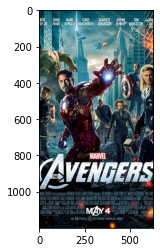

In [3]:
print(type(Avengers))
print(Avengers.dtype)
print(f"Size of the Image : {Avengers.shape}")
print(Avengers.min(), Avengers.max())

plt.imshow(Avengers)

(-0.5, 629.5, 1199.5, -0.5)

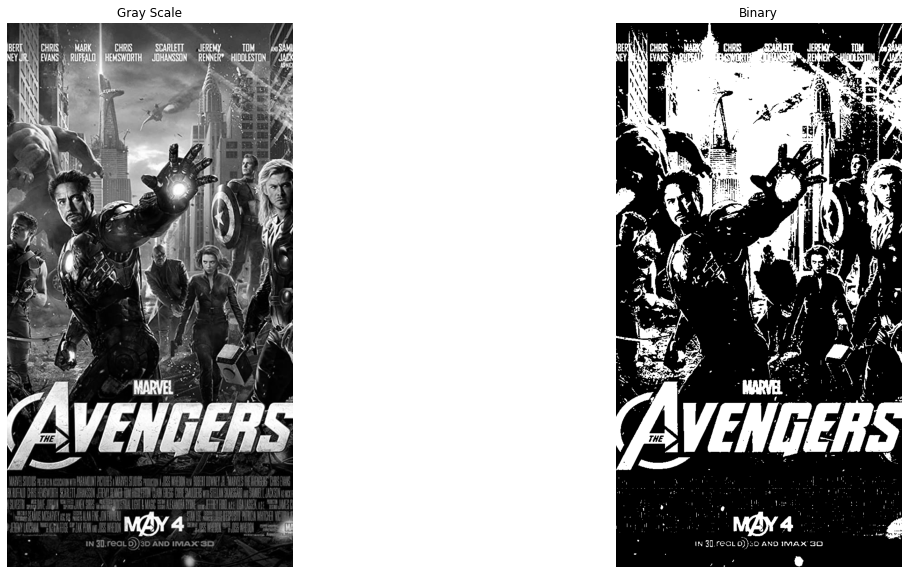

In [41]:

def Gray_scale(image):
    img = image.copy()
    img = img_as_float(img)
    gray = img @ [0.2126,0.7152,0.0722]
    return gray

img = Gray_scale(Avengers)


def Binary(gray):
    Gray = gray.copy()
    thresh = threshold_otsu(Gray)
    binary = Gray > thresh
    return binary

binary = Binary(img)

fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(20,10 ))

ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Gray Scale')
ax1.axis('off')

ax2.imshow(binary, cmap=plt.cm.gray)
ax2.set_title('Binary')
ax2.axis('off')


(640, 508, 3)


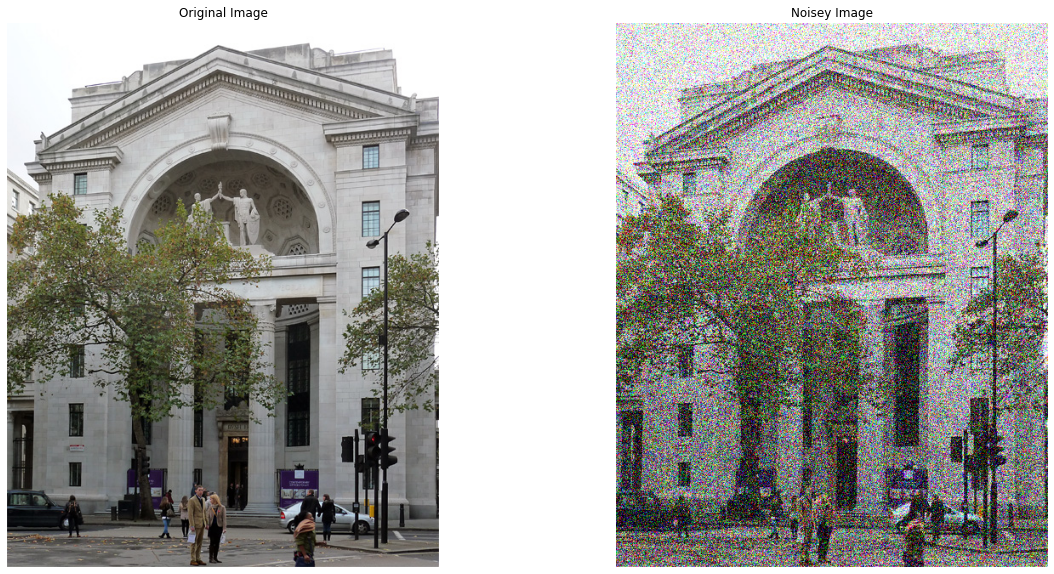

In [42]:
# Gaussian Random Noise
def Gaussian_Random_Noise(image):
    img = image.copy()
    img = img_as_float(img)
    img = random_noise(img , mode="gaussian" ,var=0.1)
    return img

Noise_image = Gaussian_Random_Noise(bush_house)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True , figsize=(20,10 ))

ax1.imshow(bush_house)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(Noise_image)
ax2.set_title('Noisey Image')
ax2.axis('off')

print(Noise_image.shape)

(-0.5, 507.5, 639.5, -0.5)

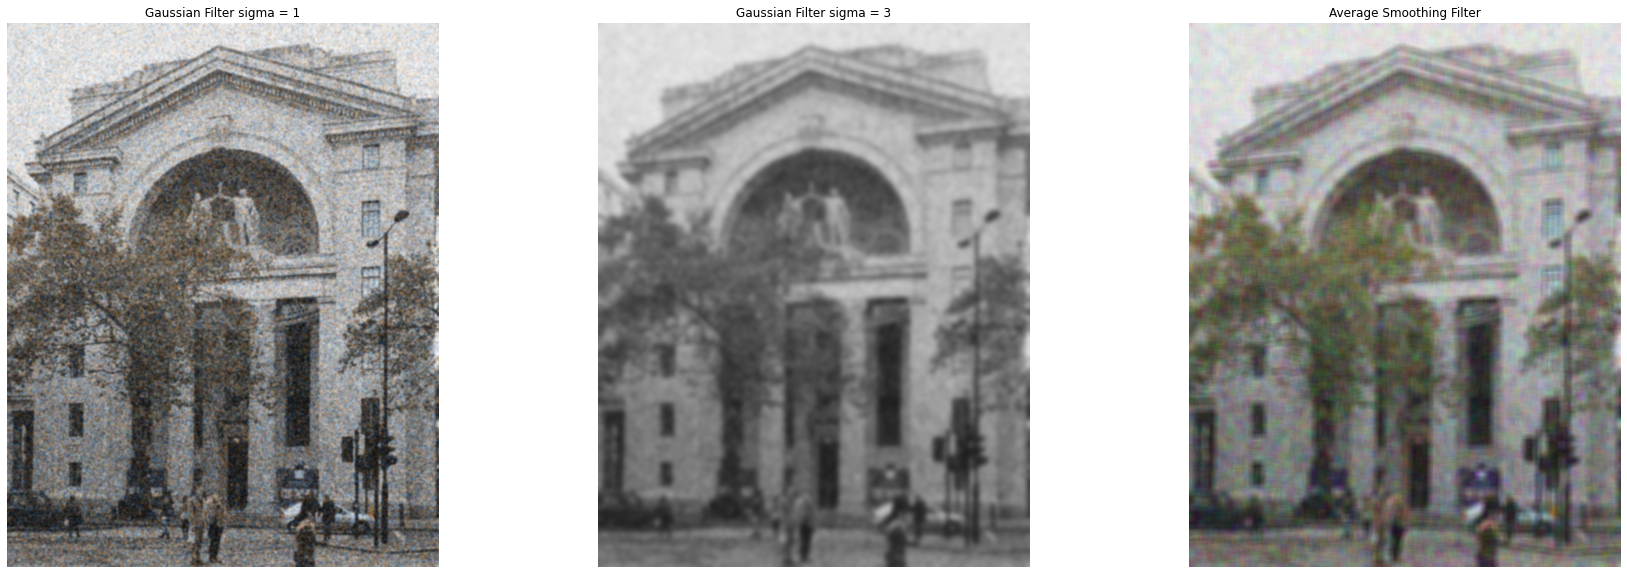

In [43]:
# Gaussian Mask to Filter , sigma = 1 

def Gaussian_Filter(NoiseImage, sigma):
    Noise = NoiseImage.copy()
    filtered_img = ndimage.gaussian_filter(Noise, sigma=sigma, mode='reflect')
    return filtered_img

filtered_img_1 = Gaussian_Filter(Noise_image,1)
filtered_img_3 = Gaussian_Filter(Noise_image,3)


# Smoothing Mask 
mean_kernel_9 = np.full(shape=(9,9) ,fill_value=1/81, dtype=np.float32)

def SmoothingMask(NoiseImage): 
    Noise = NoiseImage.copy()
    channels = {}
    for i in range(3):
        #filteredImage = ndimage.correlate(Noise[:,:,i], mean_kernel_9, mode='reflect')
        filteredImage = ndimage.convolve(Noise[:,:,i], mean_kernel_9, mode='reflect')
        channels[i] = filteredImage
    filtered_image = np.dstack((channels[0],channels[1],channels[2]))
    return filtered_image

filtered_image_smooth = SmoothingMask(Noise_image)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True , figsize=(30,10 ))

ax1.imshow(filtered_img_1)
ax1.set_title('Gaussian Filter sigma = 1')
ax1.axis('off')

ax2.imshow(filtered_img_3)
ax2.set_title('Gaussian Filter sigma = 3')
ax2.axis('off')

ax3.imshow(filtered_image_smooth)
ax3.set_title('Average Smoothing Filter')
ax3.axis('off')

(-0.5, 619.5, 413.5, -0.5)

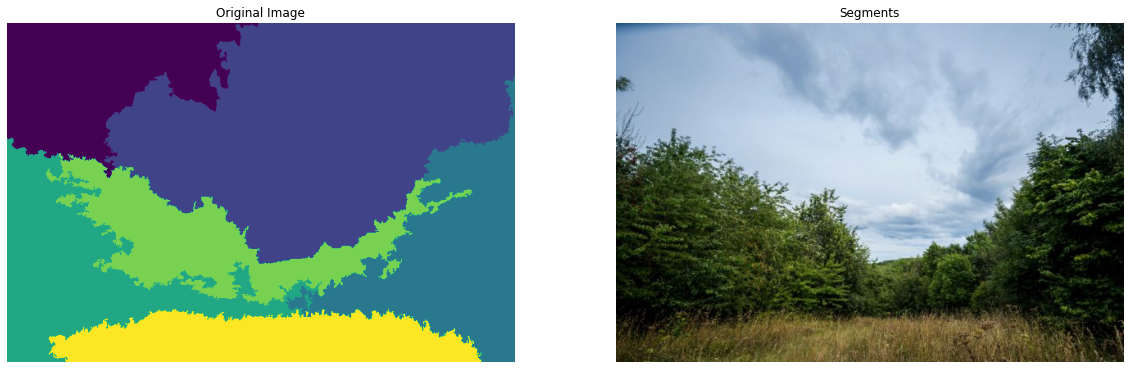

In [34]:
def K_Means(image,numOfSegments):
    segments = slic(image, n_segments=numOfSegments, compactness=10, start_label=1)
    return segments

segments = K_Means(forestry,5)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True , figsize=(20,10 ))

ax1.imshow(segments)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(forestry)
ax2.set_title('Segments')
ax2.axis('off')

(-0.5, 1069.5, 599.5, -0.5)

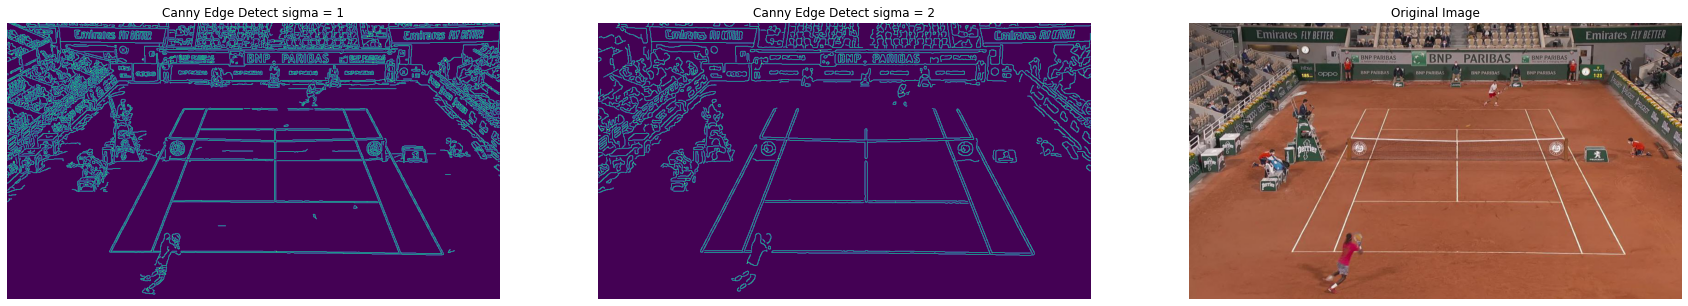

In [44]:
def Canny(image,sigma):
    img = image.copy()
    img = img_as_float(img)
    gray = color.rgb2gray(img)
    edges = feature.canny(gray, sigma=sigma)
    return edges

edges1 = Canny(rolland,1)
edges2 = Canny(rolland,2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True , figsize=(30,10 ))

ax1.imshow(edges1)
ax1.set_title('Canny Edge Detect sigma = 1')
ax1.axis('off')

ax2.imshow(edges2)
ax2.set_title('Canny Edge Detect sigma = 2')
ax2.axis('off')

ax3.imshow(rolland)
ax3.set_title('Original Image')
ax3.axis('off')

Number of angles between lines : 22
Number of lines : 22


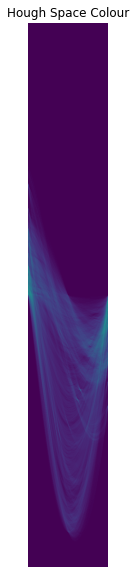

In [30]:
def HoughLine(edge):
    # Set a precision of 0.5 degree.
    tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
    h, theta, d = hough_line(edge, theta=tested_angles)
    return h , theta , d

def HoughLinePeaks(h, theta , d):
    h, q, d = hough_line_peaks(h, theta, d)
    return h, q, d

HL_HoughSpace , Theta , Distances = HoughLine(edges1)
h, q, d = HoughLinePeaks(HL_HoughSpace , Theta , Distances)
angle_list=[]  #Create an empty list to capture all angles


fig, ax = plt.subplots(1, 1, sharey=True , figsize=(20,10 ))

ax.imshow(HL_HoughSpace)
ax.set_title('Hough Space Colour')
ax.axis('off')

print(f"Number of angles between lines : {len(q)}")
print(f"Number of lines : {len(d)}")

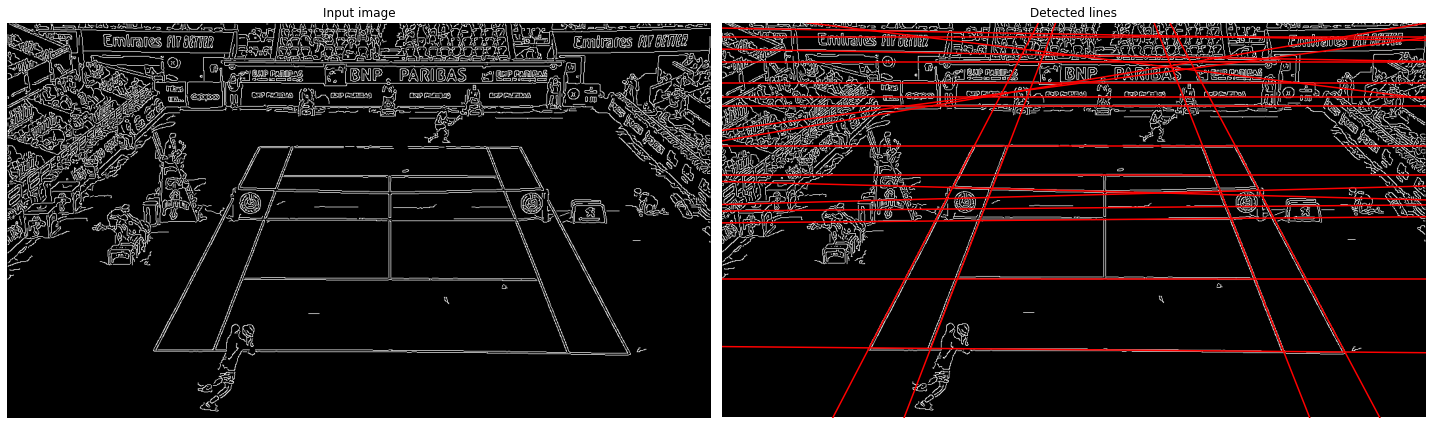

In [35]:
# Generating figure 1
fig, axes = plt.subplots(1, 2, figsize=(20, 10),  squeeze=False)
ax = axes.ravel()

ax[0].imshow(edges1, cmap='gray')
ax[0].set_title('Input image')
ax[0].set_axis_off()



ax[1].imshow(edges1, cmap='gray')

origin = np.array((0, edges1.shape[1]))

for _, angle, dist in zip(*HoughLinePeaks(HL_HoughSpace , Theta , Distances)):
    angle_list.append(angle) #Not for plotting but later calculation of angles
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[1].plot(origin, (y0, y1), '-r')
ax[1].set_xlim(origin)
ax[1].set_ylim((edges1.shape[0], 0))
ax[1].set_axis_off()
ax[1].set_title('Detected lines')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Distance (pixels)')

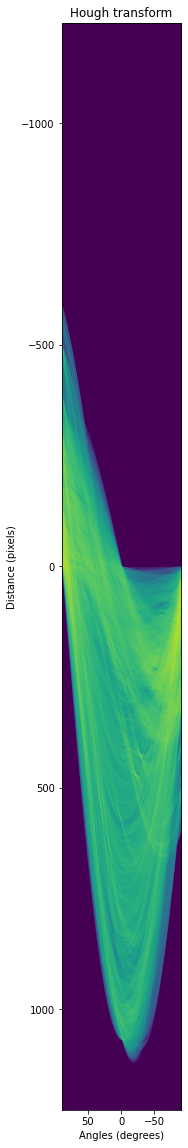

In [27]:
fig, ax = plt.subplots(1, 1, sharey=True , figsize=(20,20 ))


ax.imshow(np.log(1 + HL_HoughSpace),
             extent=[np.rad2deg(Theta[-1]), np.rad2deg(Theta[0]), Distances[-1], Distances[0]],
              aspect=1/1.5)
ax.set_title('Hough transform')
ax.set_xlabel('Angles (degrees)')
ax.set_ylabel('Distance (pixels)')
